In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv('Ice_cream selling data.csv')

# x_values = np.matrix(df['x'].to_numpy()).reshape(97, 1)
# y_values = np.matrix(df['y'].to_numpy()).reshape(97, 1)

x_values = df.iloc[:, :1]
y_values = df.iloc[:, 1]
total_examples = len(x_values)


initial_theta = np.zeros((3, 1))
ones = np.ones((total_examples, 1))


# def cost_function(self, x, y, m):
#     hyp = self.hypothesis(theta, x)
#     pass


In [43]:
x_values.insert(0, 'x0', ones)

In [44]:
x_values

,x0,Temperature (°C)
0,1.0,-4.662263
1,1.0,-4.316559
2,1.0,-4.213985
3,1.0,-3.949661
4,1.0,-3.578554
5,1.0,-3.455712
6,1.0,-3.108440
7,1.0,-3.081303
8,1.0,-2.672461
9,1.0,-2.652287


In [45]:
x2 = np.square(x_values.iloc[:, 1])

In [46]:
x_values.insert(2, 'x2', x2)

In [47]:
x_values

,x0,Temperature (°C),x2
0,1.0,-4.662263,21.736693
1,1.0,-4.316559,18.632685
2,1.0,-4.213985,17.757668
3,1.0,-3.949661,15.599823
4,1.0,-3.578554,12.806047
5,1.0,-3.455712,11.941943
6,1.0,-3.108440,9.662400
7,1.0,-3.081303,9.494430
8,1.0,-2.672461,7.142047
9,1.0,-2.652287,7.034625


In [48]:
x_values = x_values.to_numpy()
y_values = df.iloc[:, 1].to_numpy().reshape((total_examples, 1))
total_examples = len(x_values)

In [49]:
y_values.shape

(49, 1)

In [50]:
initial_theta

array([[0.],
       [0.],
       [0.]])

In [51]:
np.matmul(np.transpose(x_values), y_values)

array([[ 779.3600842 ],
       [ -66.42045183],
       [9166.75041602]])

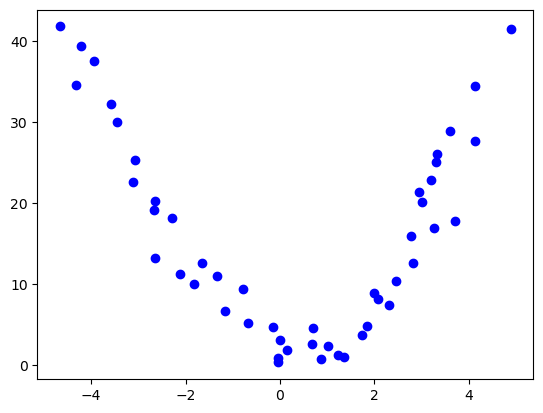

In [52]:
import matplotlib.pyplot as plt

plt.plot(x_values[:, 1], y_values, 'bo')

In [53]:
initial_theta

array([[0.],
       [0.],
       [0.]])

# Hypothesis function

In [54]:
def hypothesis(x_values, initial_theta):
    return np.matmul(x_values,  initial_theta)

# Cost function

In [55]:
def cost(x_values, theta, m, y):
    hyp = hypothesis(x_values, theta)
    return (1/2 * m) * sum((hyp - y)**2)
    

# Gradient Descent

In [59]:
def gradient(x_values, y, m, theta, alpha, iterations):
    cost_history = []
    while True:
        prev_cost = cost(x_values, theta, m, y) 
        hyp = hypothesis(x_values, theta)
        theta -= (alpha/m) * (np.matmul(np.transpose(x_values), hyp-y))
        new_cost = cost(x_values, theta, m, y)
        cost_history.append(new_cost)
        if round(prev_cost[0], 8) == round(new_cost[0], 8):
            return theta, cost_history

In [60]:
alpha = 0.01

# Prediction

In [61]:
parameters, cost_history = gradient(x_values, y_values, total_examples, initial_theta, alpha, 12)

In [62]:
parameters

array([[ 2.95172939],
       [-0.82468095],
       [ 1.82952975]])

In [64]:
len(cost_history)

2568

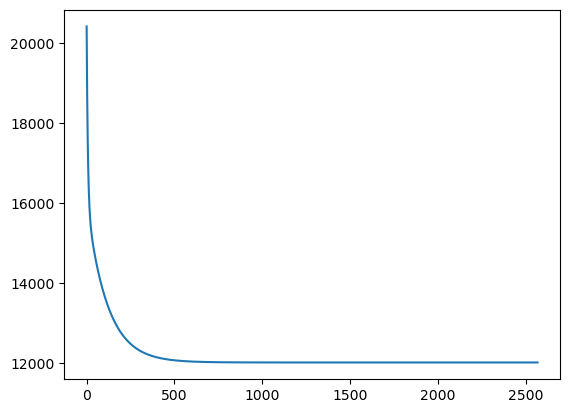

In [65]:
plt.plot(range(len(cost_history)), cost_history)

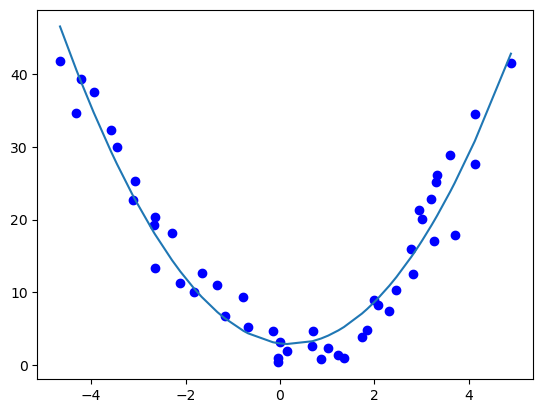

In [66]:
plt.plot(x_values[:, 1], y_values, 'bo')
plt.plot(x_values[:, 1], hypothesis(x_values, parameters))